<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.2: Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Wine Data & Define Predictor and Target

In [2]:
## Load the wine quality dataset

# Load the wine dataset from csv
wine = pd.read_csv('winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 1.2 Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

#### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

#### Methods of the `LinearRegression` object to investigate
- `fit()`
- `fit.score()`

#### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

#### Linear Regression [reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [5]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [6]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]],y_train) # calculate the score
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - (((1-r2) * (n-1))/ (n - k-1)) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2'])) #%s mean string. %.3f means 3 decimal point
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = residual sugar, sulphates, chlorides, pH, density, fixed acidity, alcohol, red_wine, total sulfur dioxide, volatile acidity, citric acid, free sulfur dioxide
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.000; Best = 0.000
(Step) - New Best!   : Feature = residual sugar; R^2 = 0.001; Adjusted R^2 = 0.000
(Step) Trying sulphates...
(Step) - Features = sulphates
(Step) - Adjusted R^2: This = 0.001; Best = 0.000
(Step) - New Best!   : Feature = sulphates; R^2 = 0.001; Adjusted R^2 = 0.001
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.039; Best = 0.001
(Step) - New Best!   : Feature = chlorides; R^2 = 0.039; Adjusted R^2 = 0.039
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = -0.001; Best = 0.039
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.095; Best = 0.039
(Step) - New Best!   : Feature = density; R^2 = 0.096; A

In [7]:
#Bonus: Cross Validation

from sklearn.model_selection import KFold


In [12]:
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 


KFold(n_splits=2, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index,"TEST:", test_index)

TRAIN: [3249 3250 3251 ... 6494 6495 6496] TEST: [   0    1    2 ... 3246 3247 3248]
TRAIN: [   0    1    2 ... 3246 3247 3248] TEST: [3249 3250 3251 ... 6494 6495 6496]


In [15]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [18]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)


Cross-validated scores: [0.23312269 0.23864105 0.23519511 0.24988053 0.29324536 0.18993661]


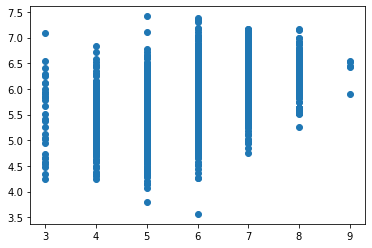

In [19]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [20]:
#R2 score of model
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)


Cross-Predicted Accuracy: 0.2630597754916152




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



